## Step2: Exploratory data analysis (included visualisation and statistical tests)

In [1]:
#read package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Train Test Split
from sklearn.model_selection import train_test_split

#Models and Performance Metrics
# import statsmodels.api as sm
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report
from sklearn.metrics import roc_curve, auc
from scipy.stats import chi2_contingency

from scipy import stats

In [544]:
#read files
# df = pd.read_csv('/Users/quinne/Desktop/full_dataframe.csv')
df_bat = pd.read_csv('/Users/quinne/Desktop/final_dataframe.csv')

In [545]:
df_bat

,Result,match_number,total_score,total_wickets_player_out,team,opponent,gender,season,month,day,...,toss_decision,choose_to_bat,choose_to_field,forced_to_bat,forced_to_field,Result_num,avg_win_rate,avg_score,avg_wickets_out,last_match_result
0,loose,1.0,135,6,Manchester Originals,Oval Invincibles,female,2021,7,21,...,bat,yes,no,no,no,0,NaN,NaN,NaN,NaN
1,win,1.0,145,8,Oval Invincibles,Manchester Originals,male,2021,7,22,...,bat,no,no,yes,no,1,NaN,NaN,NaN,NaN
2,loose,2.0,128,6,Birmingham Phoenix,London Spirit,female,2021,7,23,...,bat,no,no,yes,no,0,NaN,NaN,NaN,NaN
3,loose,2.0,144,6,London Spirit,Birmingham Phoenix,male,2021,7,23,...,bat,no,no,yes,no,0,NaN,NaN,NaN,NaN
4,win,3.0,133,5,Southern Brave,Trent Rockets,female,2021,7,24,...,bat,no,no,yes,no,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,loose,32.0,143,9,Oval Invincibles,Manchester Originals,male,2022,8,31,...,bat,yes,no,no,no,0,0.571429,147.285714,6.071429,win
119,loose,40.0,150,7,London Spirit,Manchester Originals,male,2022,9,2,...,bat,yes,no,no,no,0,0.400000,145.200000,5.933333,loose
120,win,40.0,134,6,Southern Brave,Trent Rockets,female,2022,9,2,...,bat,no,no,yes,no,1,0.800000,125.066667,5.800000,loose
121,loose,50.0,120,9,Manchester Originals,Trent Rockets,male,2022,9,3,...,bat,yes,no,no,no,0,0.533333,157.400000,6.333333,win


In [546]:
df_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Result                    123 non-null    object 
 1   match_number              123 non-null    float64
 2   total_score               123 non-null    int64  
 3   total_wickets_player_out  123 non-null    int64  
 4   team                      123 non-null    object 
 5   opponent                  123 non-null    object 
 6   gender                    123 non-null    object 
 7   season                    123 non-null    int64  
 8   month                     123 non-null    int64  
 9   day                       123 non-null    int64  
 10  home_advantage            123 non-null    object 
 11  venue                     123 non-null    object 
 12  city                      123 non-null    object 
 13  toss_winner               123 non-null    object 
 14  winner    

### correlation

In [547]:
correlation_matrix = df_bat.corr()
correlation_matrix

,match_number,total_score,total_wickets_player_out,season,month,day,Result_num,avg_win_rate,avg_score,avg_wickets_out
match_number,1.000000,-0.105530,0.110140,-0.079148,0.577425,-0.048699,-0.044221,0.071341,-0.057042,0.016391
total_score,-0.105530,1.000000,-0.564064,0.144600,0.027507,-0.077429,0.414632,-0.045742,0.323325,-0.163327
total_wickets_player_out,0.110140,-0.564064,1.000000,-0.034373,0.010903,0.046180,-0.365166,-0.082812,0.120214,-0.141022
season,-0.079148,0.144600,-0.034373,1.000000,0.487897,0.080861,0.103725,-0.146457,0.133518,-0.120528
month,0.577425,0.027507,0.010903,0.487897,1.000000,-0.563079,-0.018634,-0.081331,-0.048486,-0.192298
day,-0.048699,-0.077429,0.046180,0.080861,-0.563079,1.000000,0.078744,0.007648,-0.005594,0.172168
Result_num,-0.044221,0.414632,-0.365166,0.103725,-0.018634,0.078744,1.000000,0.052710,-0.011409,-0.118954
avg_win_rate,0.071341,-0.045742,-0.082812,-0.146457,-0.081331,0.007648,0.052710,1.000000,-0.103360,0.142419
avg_score,-0.057042,0.323325,0.120214,0.133518,-0.048486,-0.005594,-0.011409,-0.103360,1.000000,-0.520188
avg_wickets_out,0.016391,-0.163327,-0.141022,-0.120528,-0.192298,0.172168,-0.118954,0.142419,-0.520188,1.000000


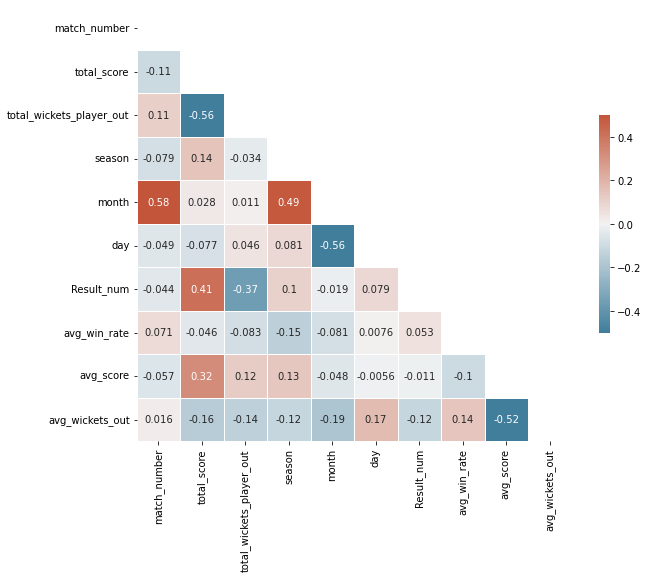

In [548]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.5, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [549]:
# Combinations of variables with absolute values of correlation greater than 0.5
high_corr_var=np.where((correlation_matrix>0.5) | (correlation_matrix<-0.5))
high_corr_var=[(correlation_matrix.columns[x],correlation_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

for var_pair in high_corr_var:
    print(var_pair)

('match_number', 'month')
('total_score', 'total_wickets_player_out')
('month', 'day')
('avg_score', 'avg_wickets_out')


In [550]:
#checking the missing value
df_bat.isnull().sum()

Result                      0
match_number                0
total_score                 0
total_wickets_player_out    0
team                        0
opponent                    0
gender                      0
season                      0
month                       0
day                         0
home_advantage              0
venue                       0
city                        0
toss_winner                 0
winner                      0
toss_decision               0
choose_to_bat               0
choose_to_field             0
forced_to_bat               0
forced_to_field             0
Result_num                  0
avg_win_rate                8
avg_score                   8
avg_wickets_out             8
last_match_result           8
dtype: int64

In [551]:
df_bat = df_bat.fillna(0)

In [552]:
columns_to_check = ['Result','match_number', 'total_score','total_wickets_player_out', 
                    'team', 'opponent', 
                    'gender', 'season', 
                    'month','day',
                    'home_advantage','venue', 'city', 
                    'toss_winner', 'winner',
                    'toss_decision', 
                    'choose_to_bat','choose_to_field','forced_to_bat','forced_to_field',
                   'avg_win_rate','avg_score','avg_wickets_out','last_match_result']
#8 teams, 8 venue, because london has two venue
for col in columns_to_check:
    print(f"\nDistribution for column: {col}")
    print(df_bat[col].value_counts())


Distribution for column: Result
loose    68
win      55
Name: Result, dtype: int64

Distribution for column: match_number
1.0     4
14.0    4
24.0    4
23.0    4
40.0    4
21.0    4
20.0    4
2.0     4
18.0    4
17.0    4
16.0    4
15.0    4
13.0    4
12.0    4
11.0    4
10.0    4
8.0     4
7.0     4
6.0     4
50.0    4
4.0     4
3.0     4
29.0    3
32.0    3
31.0    3
30.0    3
19.0    3
28.0    3
27.0    3
26.0    3
25.0    3
22.0    3
5.0     3
9.0     2
Name: match_number, dtype: int64

Distribution for column: total_score
122    5
143    5
145    5
127    4
123    3
      ..
95     1
96     1
168    1
107    1
101    1
Name: total_score, Length: 74, dtype: int64

Distribution for column: total_wickets_player_out
6     30
5     17
7     17
8     15
4     15
9     10
3      9
10     8
2      2
Name: total_wickets_player_out, dtype: int64

Distribution for column: team
Welsh Fire                18
Northern Superchargers    18
Birmingham Phoenix        17
London Spirit             16

#### We can simply observe the following pattern through the values of each variable:

1. the city that hosts the most matches is London and the venue is Lord's;


2. the number of players most often out at half-time is 6;


3. the strongest team would be Southern Brave, as it has the most toss winners, the most winners, and the most appearances in opponents; The weakest team would be Welsh Fire, as it has the least number of winners.


4. the occurrence of home advantage is only about 38%;


5. only 34 games were actively batted, while 89 games were forced to be batted, the vast majority.

### Group 1: For variables with only two values

#### 7 variables: 'Result'  'gender' 'season' 'home_advantage' 'choice_to_bat''forced_to_bat' ‘last_match_result’

#### 'toss_decision' 'choose_to_field' 'forced_to_field' These three variables do not need to be considered as they have only one value

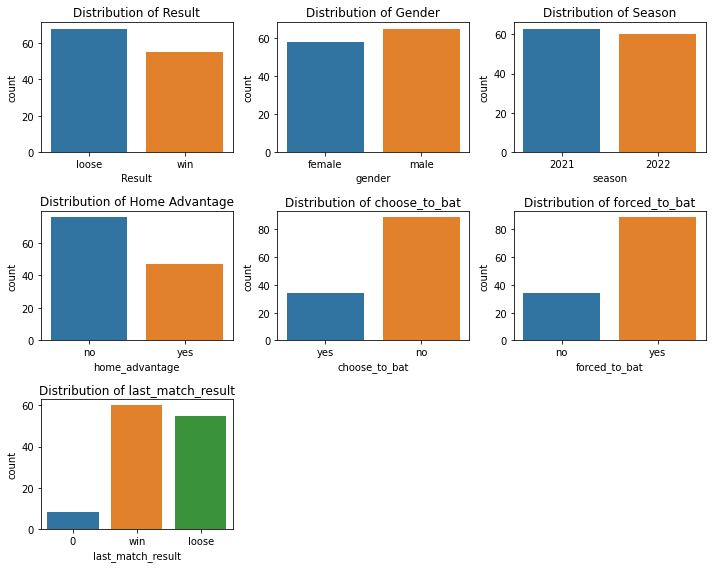

In [553]:
fig, ax = plt.subplots(3, 3, figsize=(10, 8))

sns.countplot(x='Result', data=df_bat, ax=ax[0, 0]) 
ax[0, 0].set_title('Distribution of Result')

sns.countplot(x='gender', data=df_bat, ax=ax[0, 1]) 
ax[0, 1].set_title('Distribution of Gender')

sns.countplot(x='season', data=df_bat, ax=ax[0, 2])
ax[0, 2].set_title('Distribution of Season')

sns.countplot(x='home_advantage', data=df_bat, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Home Advantage')

sns.countplot(x='choose_to_bat', data=df_bat, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of choose_to_bat')

sns.countplot(x='forced_to_bat', data=df_bat, ax=ax[1, 2])
ax[1, 2].set_title('Distribution of forced_to_bat')

sns.countplot(x='last_match_result', data=df_bat, ax=ax[2, 0])
ax[2, 0].set_title('Distribution of last_match_result')

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

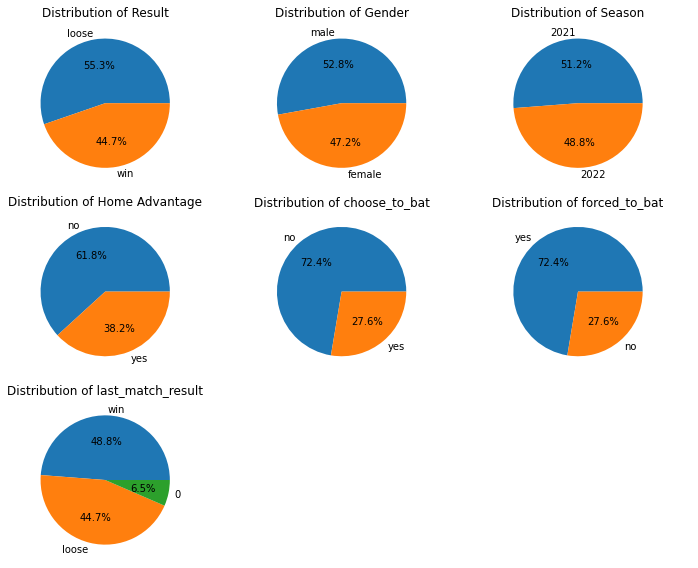

In [554]:
fig, ax = plt.subplots(3, 3, figsize=(10, 8))  

result_counts = df_bat['Result'].value_counts()
ax[0, 0].pie(result_counts, labels = result_counts.index, autopct='%1.1f%%')
ax[0, 0].set_title('Distribution of Result')

gender_counts = df_bat['gender'].value_counts()
ax[0, 1].pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%')
ax[0, 1].set_title('Distribution of Gender')

season_counts = df_bat['season'].value_counts()
ax[0, 2].pie(season_counts, labels = season_counts.index, autopct='%1.1f%%')
ax[0, 2].set_title('Distribution of Season')

home_advantage_counts = df_bat['home_advantage'].value_counts()
ax[1, 0].pie(home_advantage_counts, labels = home_advantage_counts.index, autopct='%1.1f%%')
ax[1, 0].set_title('Distribution of Home Advantage')

choose_to_bat_counts = df_bat['choose_to_bat'].value_counts()
ax[1, 1].pie(choose_to_bat_counts, labels = choose_to_bat_counts.index, autopct='%1.1f%%')
ax[1, 1].set_title('Distribution of choose_to_bat')

forced_to_bat_counts = df_bat['forced_to_bat'].value_counts()
ax[1, 2].pie(forced_to_bat_counts, labels = forced_to_bat_counts.index, autopct='%1.1f%%')
ax[1, 2].set_title('Distribution of forced_to_bat')

last_match_result_counts = df_bat['last_match_result'].value_counts()
ax[2, 0].pie(last_match_result_counts, labels = last_match_result_counts.index, autopct='%1.1f%%')
ax[2, 0].set_title('Distribution of last_match_result')

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [555]:
contingency_table_1 = pd.crosstab(df_bat['Result'], df_bat['last_match_result'])
chi2, p, dof, expected = chi2_contingency(contingency_table_1)
print(f"Chi-Square Statistic for last_match_result: {chi2}, p-value: {p}")

Chi-Square Statistic for last_match_result: 0.2867956976178903, p-value: 0.8664093004089439


In [556]:
contingency_table_2 = pd.crosstab(df_bat['Result'], df_bat['home_advantage'])
chi2, p, dof, expected = chi2_contingency(contingency_table_2)
print(f"Chi-Square Statistic for home_advantage: {chi2}, p-value: {p}")

Chi-Square Statistic for home_advantage: 0.8592993596960319, p-value: 0.3539348350651833


In [557]:
contingency_table_3 = pd.crosstab(df_bat['Result'], df_bat['choose_to_bat'])
chi2, p, dof, expected = chi2_contingency(contingency_table_3)
print(f"Chi-Square Statistic for choose_to_bat: {chi2}, p-value: {p}")

Chi-Square Statistic for choose_to_bat: 2.254973010203901, p-value: 0.1331857776693032


### conclusion:

1.  Nearly half win/lose (excluding the one match with no result, indicating that this is a very balanced data set), so we can change it into binary variable (win map to 1, loose map to 0)¶.


2.  Slightly more men's races than women's, with more races in 2021 than in 2022.


3. In theory, each team should have four home games and four away games each season, but due to the reduced season for the 2022 women, there will be slightly less home advantage than if there was no home advantage.


4.  When a team toss wins, it is more likely to actively choose to field, and when a team toss loses, it is more likely to be forced to bat.


|  bat | yes | no | 
|---------|---------|---------|
|  choose to bat  |   27.6% | 72.4%   | 
|  forced to bat  |   72.4%  | 27.6%  | 



###  Group 2: Multicategorical variables 

#### 6 variables:  'winner'  'team' 'opponent' 'toss_winner' 'avenue' 'city' 

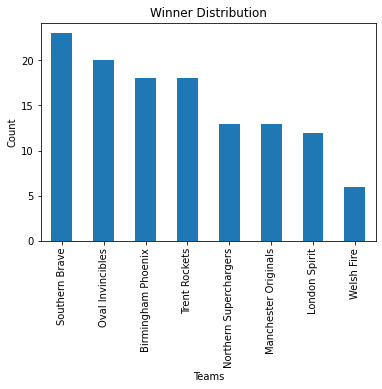

In [558]:
df_bat['winner'].value_counts().plot(kind='bar')
plt.title('Winner Distribution')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.show()  

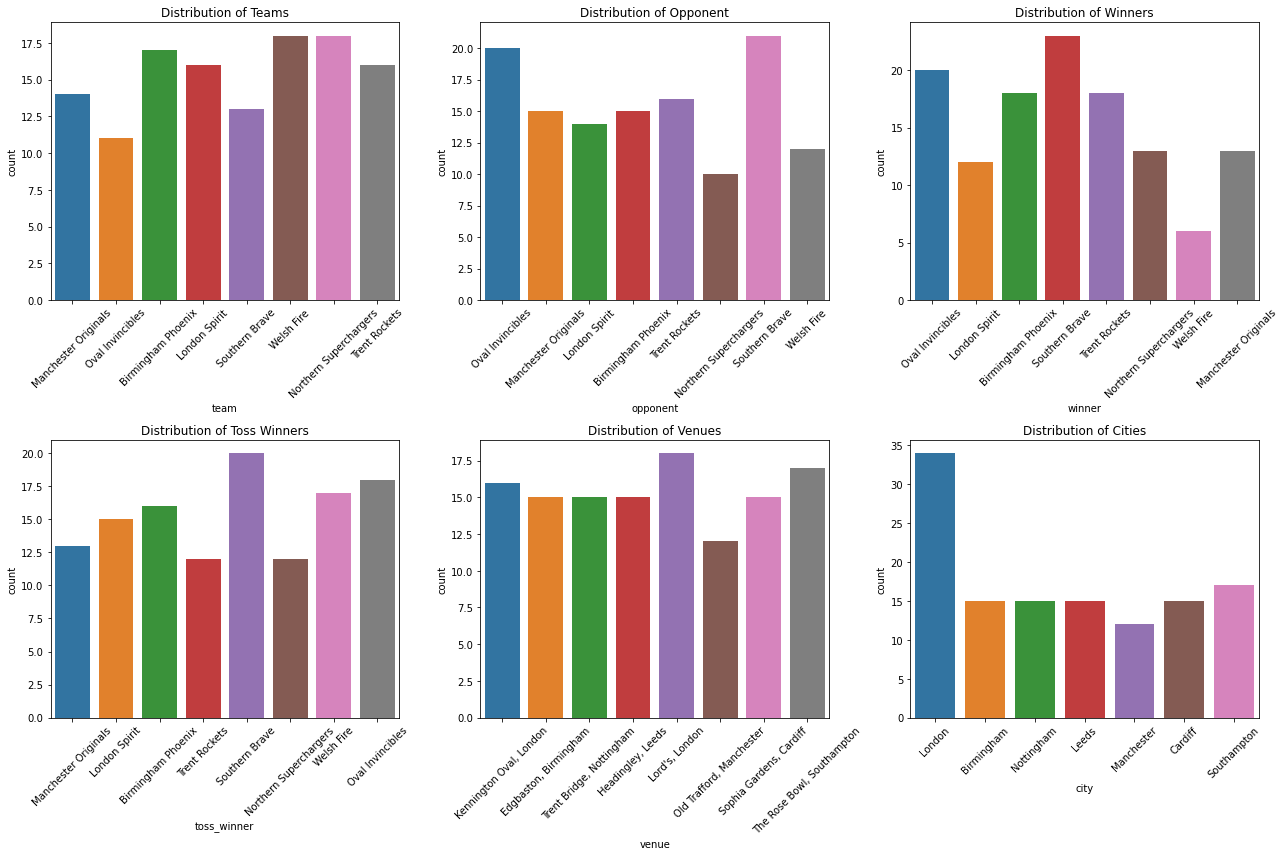

In [559]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))  

sns.countplot(x='team', data=df_bat, ax=ax[0,0])
ax[0,0].set_title('Distribution of Teams')
ax[0,0].tick_params(axis='x', rotation=45)

sns.countplot(x='opponent', data=df_bat, ax=ax[0,1])
ax[0,1].set_title('Distribution of Opponent')
ax[0,1].tick_params(axis='x', rotation=45)

sns.countplot(x='winner', data=df_bat, ax=ax[0,2])
ax[0,2].set_title('Distribution of Winners')
ax[0,2].tick_params(axis='x', rotation=45) 

sns.countplot(x='toss_winner', data=df_bat, ax=ax[1, 0])
ax[1,0].set_title('Distribution of Toss Winners')
ax[1,0].tick_params(axis='x', rotation=45) 

sns.countplot(x='venue', data=df_bat, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Venues')
ax[1, 1].tick_params(axis='x', rotation=45) 

sns.countplot(x='city', data=df_bat, ax=ax[1, 2])
ax[1, 2].set_title('Distribution of Cities')
ax[1, 2].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

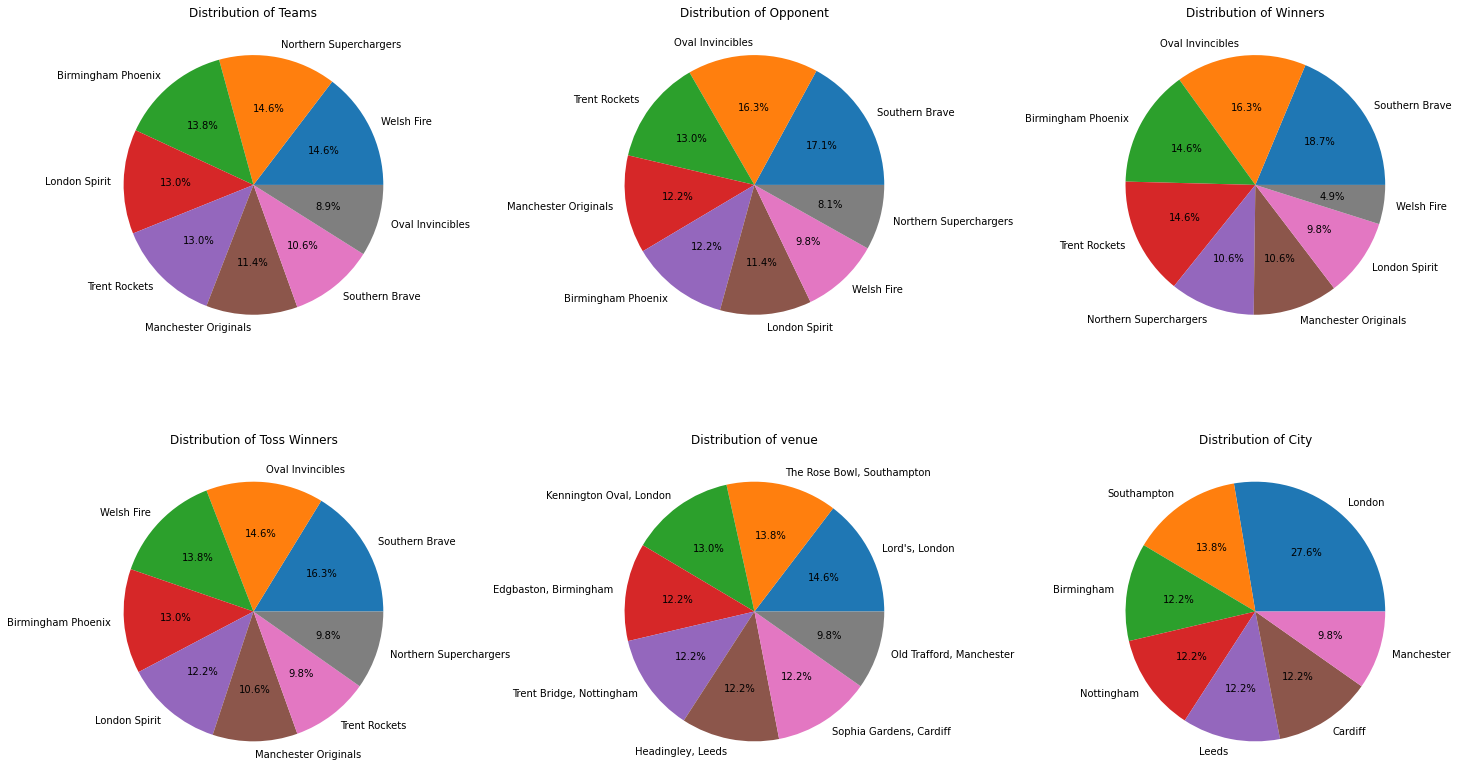

In [560]:
fig, ax = plt.subplots(2, 3, figsize=(20,12))

team_counts = df_bat['team'].value_counts()
ax[0,0].pie(team_counts, labels=team_counts.index, autopct='%1.1f%%')
ax[0,0].set_title('Distribution of Teams')

opponent_counts = df_bat['opponent'].value_counts()
ax[0,1].pie(opponent_counts, labels=opponent_counts.index, autopct='%1.1f%%')
ax[0,1].set_title('Distribution of Opponent')

winner_counts = df_bat['winner'].value_counts()
ax[0,2].pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%')
ax[0,2].set_title('Distribution of Winners')

toss_winner_counts = df_bat['toss_winner'].value_counts()
ax[1,0].pie(toss_winner_counts, labels=toss_winner_counts.index, autopct='%1.1f%%')
ax[1,0].set_title('Distribution of Toss Winners')

venue_counts = df_bat['venue'].value_counts()
ax[1,1].pie(venue_counts, labels=venue_counts.index, autopct='%1.1f%%')
ax[1,1].set_title('Distribution of venue')

city_counts = df_bat['city'].value_counts()
ax[1,2].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
ax[1,2].set_title('Distribution of City')

plt.tight_layout()
plt.show()

In [561]:
#winner and toss_winner
contingency_table = pd.crosstab(df_bat['winner'], df_bat['toss_winner'])
contingency_table

toss_winner,Birmingham Phoenix,London Spirit,Manchester Originals,Northern Superchargers,Oval Invincibles,Southern Brave,Trent Rockets,Welsh Fire
winner,,,,,,,,
Birmingham Phoenix,10,0,0,2,1,1,1,3
London Spirit,0,6,1,2,1,0,0,2
Manchester Originals,2,1,4,1,1,1,0,3
Northern Superchargers,1,1,2,4,2,2,0,1
Oval Invincibles,2,3,2,0,9,2,1,1
Southern Brave,1,2,1,1,2,12,2,2
Trent Rockets,0,2,3,1,1,1,8,2
Welsh Fire,0,0,0,1,1,1,0,3


In [562]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic : {chi2}, p-value : {p}")

Chi-Square Statistic : 144.2896446817586, p-value : 2.5263710852045262e-11


In [563]:
#No evidence found for a relationship between toss_winner and home_advantage
cross_tab = pd.crosstab(df_bat['toss_winner'], df_bat['home_advantage'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Chi-square statistic: ", chi2)
print("p-value: ", p)

Chi-square statistic:  4.769006187516785
p-value:  0.6881284212733275


In [564]:
#winner and team
contingency_table = pd.crosstab(df_bat['winner'], df_bat['team'])
contingency_table
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic : {chi2}, p-value : {p}")

Chi-Square Statistic : 148.55830208152287, p-value : 5.8540437635514254e-12


In [565]:
#winner and city
contingency_table = pd.crosstab(df_bat['winner'], df_bat['city'])
contingency_table
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic : {chi2}, p-value : {p}")

Chi-Square Statistic : 193.99566031652347, p-value : 2.1006785920648015e-21


In [566]:
# team and venue
contingency_table = pd.crosstab(df_bat['team'], df_bat['venue'])
contingency_table
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic : {chi2}, p-value : {p}")

Chi-Square Statistic : 105.35620455912951, p-value : 5.32220535484448e-06


In [567]:
#venue and city
contingency_table = pd.crosstab(df_bat['venue'], df_bat['city'])
contingency_table
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic : {chi2}, p-value : {p}")

Chi-Square Statistic : 738.0, p-value : 5.295036338622737e-128


### conclusion:  There is a strong relationship between 'toss_winner' and 'winner' .

1.  There is a correlation between 'winner' and 'team', 'toss_winner', and 'city'('venue') as all p-values are much less than 0.05. 

2. There is a correlation between 'team' and 'toss_winner', 'city'('venue') as all p-values are much less than 0.05.

3. There is a correlation between toss_winner and 'city'('venue') as all p-values are much less than 0.05.

4. There is clearly a correlation between venue and city, as the p-values are close to 0.

5. No evidence found that toss_winner and home_advantage are related.

###  Group 3: Numeric variables
#### 8 variables: 'match_number' 'total_score' 'total_wickets_player_out' 'month' 'day' 
#### 'avg_win_rate'	'avg_score'	'avg_wickets_out'

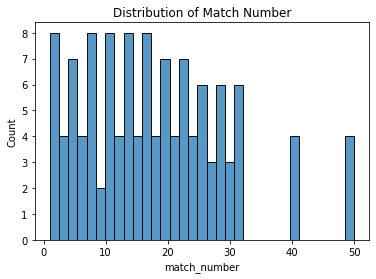

In [568]:
plt.figure(figsize=(6,4))
sns.histplot(data=df_bat, x="match_number", bins=33)
plt.title('Distribution of Match Number')
plt.show()

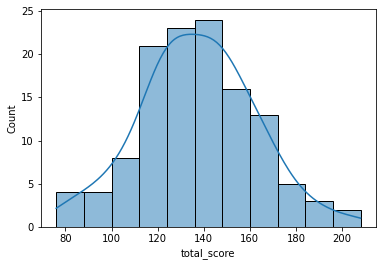

In [569]:
sns.histplot(df_bat['total_score'], kde=True)
plt.show()

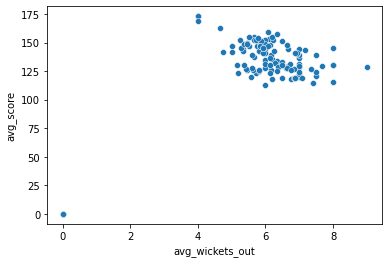

In [570]:
sns.scatterplot(x='avg_wickets_out', y='avg_score', data=df_bat)
plt.show()

In [571]:
df_math=df_bat[['total_wickets_player_out', 'total_score','match_number','month','day','avg_win_rate','avg_wickets_out', 'avg_score']].describe()

In [572]:
df_math

,total_wickets_player_out,total_score,match_number,month,day,avg_win_rate,avg_wickets_out,avg_score
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,6.219512,137.121951,17.723577,7.845528,16.918699,0.470193,5.805111,128.724250
std,1.981623,25.037541,11.434275,0.444133,9.064065,0.272448,1.739459,36.367476
min,2.000000,76.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,122.000000,8.500000,8.000000,10.000000,0.333333,5.600000,125.829545
50%,6.000000,137.000000,17.000000,8.000000,17.000000,0.444444,6.000000,136.000000
75%,8.000000,153.000000,25.000000,8.000000,24.500000,0.630682,6.738636,147.142857
max,10.000000,208.000000,50.000000,9.000000,31.000000,1.000000,9.000000,173.000000


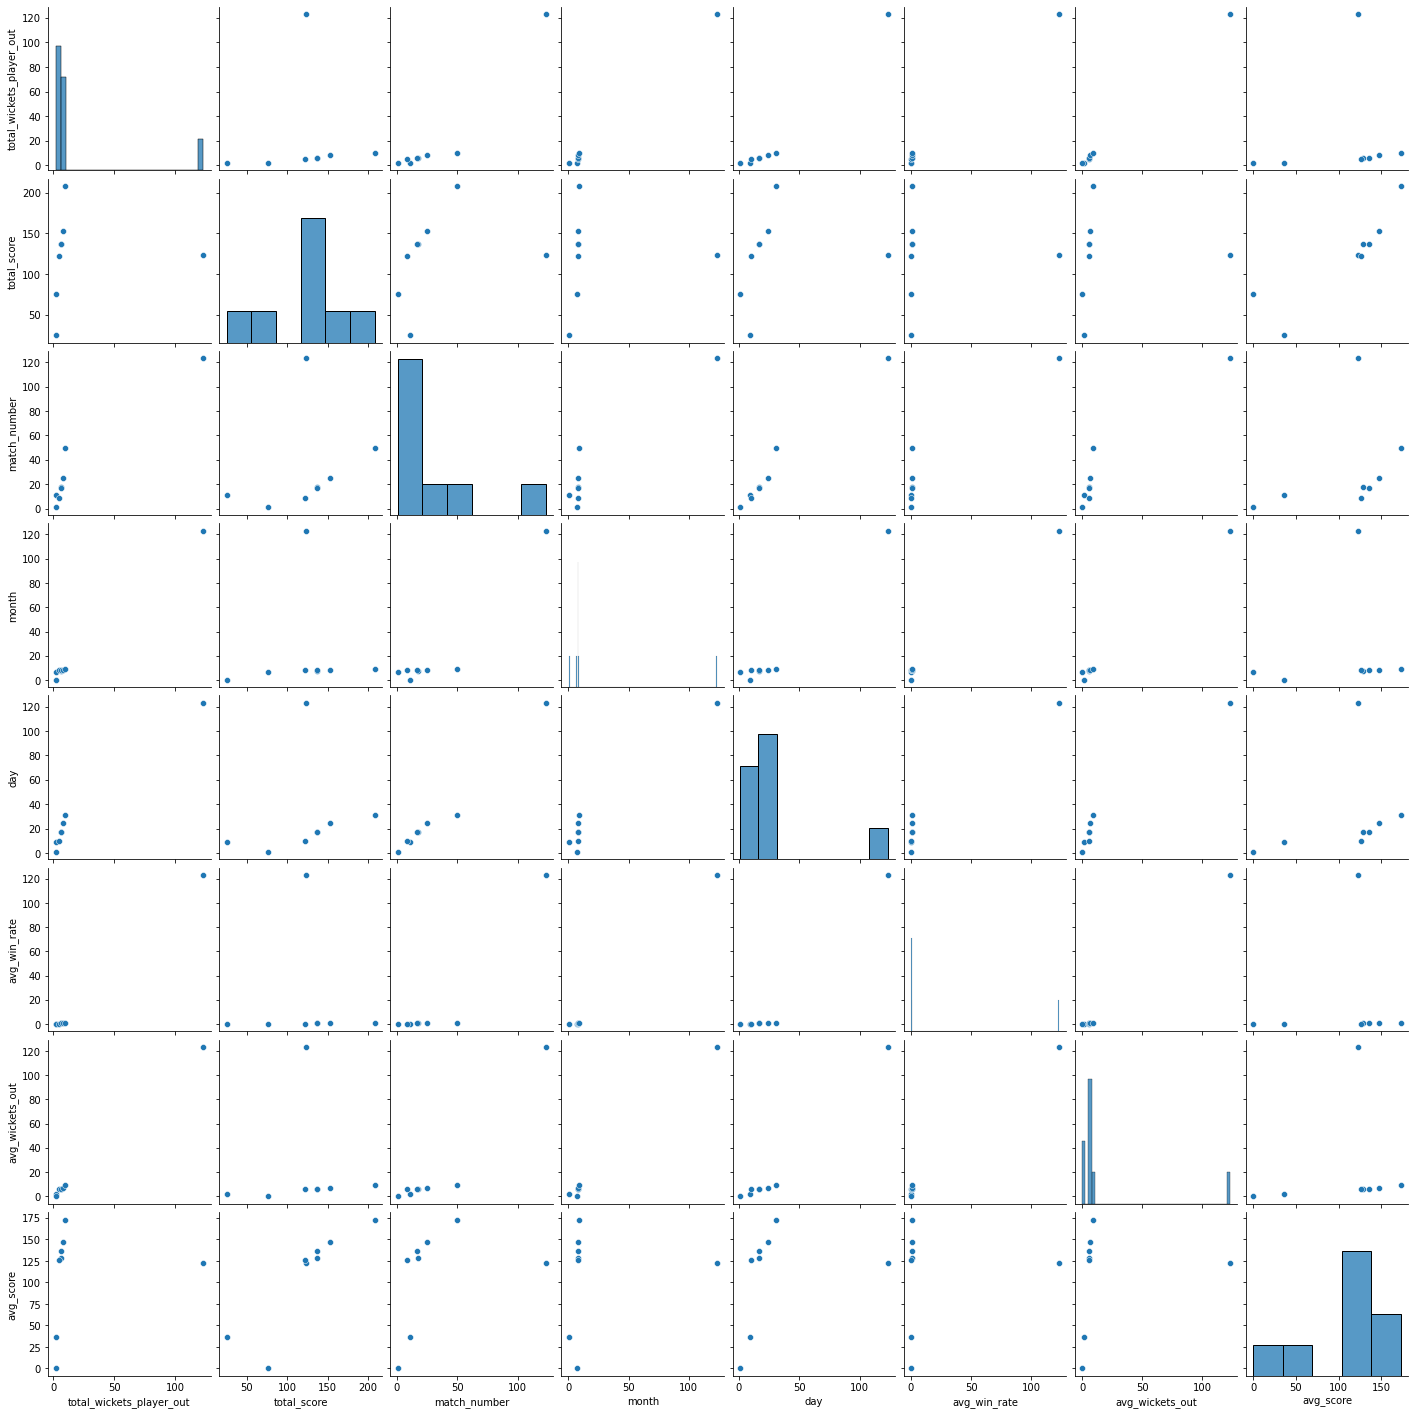

In [573]:
sns.pairplot(df_math)
plt.show()

1. total_score and total_wickets_player_out correlation is -0.564064. 
2. The correlation between avg_score and avg_wickets_out is 0.743716; 
3. Correlation between match_number and month is 0.577425; 
4. The correlation between month and day is -0.563079

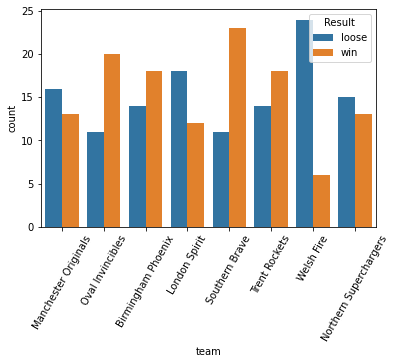

In [574]:
sns.countplot(data=df, x='team', hue='Result')
plt.xticks(rotation=60)
plt.show()

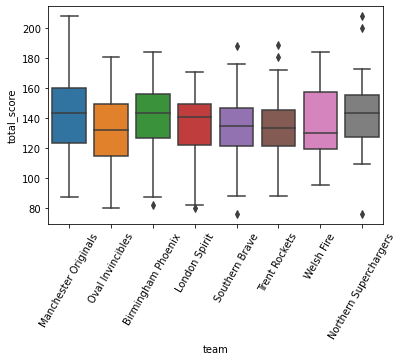

In [575]:
sns.boxplot(data=df, x='team', y='total_score')
plt.xticks(rotation=60)
plt.show()

In [576]:
# We can run a t-test to see if there is a significant difference in total_score between the winning and losing groups

win_group = df_bat[df_bat['Result'] == 'win']['total_score']
lose_group = df_bat[df_bat['Result'] == 'loose']['total_score']

t_stat, p_val = stats.ttest_ind(win_group, lose_group)
print(f"t-statistic: {t_stat}, p-value: {p_val}")
#Of course there is a significant difference

t-statistic: 5.012101863010449, p-value: 1.8609745773519897e-06


In [577]:
def perform_tests(df):
    from itertools import combinations

    # Group 1: Binary Variables
    binary_vars = ['Result', 'gender', 'season', 'home_advantage',
                   'choose_to_bat', 'forced_to_bat']

    for var1, var2 in combinations(binary_vars, 2):
        crosstab = pd.crosstab(df[var1], df[var2])
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        print(f'p-value of chi-square test between {var1} and {var2}: {p}')

    # Group 2: Multicategorical Variables
    multicategorical_vars = ['winner', 'team', 'opponent', 'toss_winner', 'venue', 'city']

    for var1, var2 in combinations(multicategorical_vars, 2):
        crosstab = pd.crosstab(df[var1], df[var2])
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        print(f'p-value of chi-square test between {var1} and {var2}: {p}')

    # Group 3: Numeric Variables
    numeric_vars = ['match_number', 'total_score' ,'total_wickets_player_out', 
                    'month' ,'day',
                    'avg_win_rate','avg_score','avg_wickets_out']
    

    for var1, var2 in combinations(numeric_vars, 2):
        corr, p = stats.pearsonr(df[var1], df[var2])
        print(f'Pearson correlation coefficient between {var1} and {var2}: {corr}')

    # Between Categorical (both binary and multicategorical) and Numeric Variables
    for cat_var in (binary_vars + multicategorical_vars):
        for num_var in numeric_vars:
            groups = [df[num_var][df[cat_var] == category] for category in df[cat_var].unique()]
            f, p = stats.f_oneway(*groups)
            print(f'p-value of ANOVA between {cat_var} and {num_var}: {p}')


perform_tests(df_bat)

p-value of chi-square test between Result and gender: 0.837359186831013
p-value of chi-square test between Result and season: 0.33256472470192694
p-value of chi-square test between Result and home_advantage: 0.3539348350651833
p-value of chi-square test between Result and choose_to_bat: 0.1331857776693032
p-value of chi-square test between Result and forced_to_bat: 0.1331857776693032
p-value of chi-square test between gender and season: 0.5171108120912608
p-value of chi-square test between gender and home_advantage: 0.6190795531943524
p-value of chi-square test between gender and choose_to_bat: 0.8297093131770328
p-value of chi-square test between gender and forced_to_bat: 0.8297093131770328
p-value of chi-square test between season and home_advantage: 0.5592030744148571
p-value of chi-square test between season and choose_to_bat: 0.9725327141180052
p-value of chi-square test between season and forced_to_bat: 0.9725327141180052
p-value of chi-square test between home_advantage and choo

p-value of ANOVA between venue and total_wickets_player_out: 0.10774170889957445
p-value of ANOVA between venue and month: 0.5564327294044712
p-value of ANOVA between venue and day: 0.19866872832665716
p-value of ANOVA between venue and avg_win_rate: 0.8244478081581431
p-value of ANOVA between venue and avg_score: 0.4941455652851807
p-value of ANOVA between venue and avg_wickets_out: 0.3182929244216965
p-value of ANOVA between city and match_number: 0.5768665534215316
p-value of ANOVA between city and total_score: 0.17502025553760622
p-value of ANOVA between city and total_wickets_player_out: 0.06974170416163158
p-value of ANOVA between city and month: 0.46081121871941577
p-value of ANOVA between city and day: 0.1885340265151131
p-value of ANOVA between city and avg_win_rate: 0.8155230466148622
p-value of ANOVA between city and avg_score: 0.6173307717808396
p-value of ANOVA between city and avg_wickets_out: 0.5884656795369749


1. Chi-square tests:

Most p-values are greater than 0.05, meaning there is no statistically significant association between most pairs of categorical variables.
However, there is a significant association between "choose_to_bat" and "forced_to_bat", and several pairs involving the variables "winner", "team", "opponent", "toss_winner", "venue", and "city".


2. Pearson correlation coefficients:

There are significant negative correlations between "total_score" and "total_wickets_player_out", and "month" and "day".
There are significant positive correlations between "match_number" and "month", "avg_win_rate", "avg_score", "avg_wickets_out", and several others.


3. ANOVA:

The p-value is less than 0.05 for the ANOVA test between "Result" and "total_score", "total_wickets_player_out", indicating a significant difference in these variables across different match results.
There's also a significant difference in "avg_score" across genders and seasons.

In [578]:
X = df_bat[['total_wickets_player_out', 'total_score', 
            'avg_wickets_out', 'avg_score', 'avg_win_rate', 
            'month', 'day', 'match_number']]
y = df_bat['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       loose       0.79      0.71      0.75        21
         win       0.67      0.75      0.71        16

    accuracy                           0.73        37
   macro avg       0.73      0.73      0.73        37
weighted avg       0.74      0.73      0.73        37

[[15  6]
 [ 4 12]]


/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 3: Feature Engineering

In [579]:
print(df_bat['last_match_result'].unique())

[0 'win' 'loose']


In [580]:
df_bat = df_bat.drop(['toss_decision', 'Result_num', 'choose_to_field', 'forced_to_field'], axis=1)

In [581]:
df_bat['toss_result'] = np.where(df_bat['toss_winner'] == df_bat['winner'], 1, 0)

In [582]:
#Categorical variable processing
df_bat['Result'] = df_bat['Result'].map({'loose': 0, 'win': 1})
df_bat['gender'] = df_bat['gender'].map({'female': 0, 'male': 1})
df_bat['home_advantage']=df_bat['home_advantage'].map({'no': 0, 'yes': 1})
df_bat['choose_to_bat']=df_bat['choose_to_bat'].map({'no': 0, 'yes': 1})
df_bat['forced_to_bat']=df_bat['forced_to_bat'].map({'no': 0, 'yes': 1})

In [583]:
def map_last_match_result(value):
    if value == 'win':
        return 1
    elif value == 'loose':
        return 0
    else:
        return value  # For 0

df_bat['last_match_result'] = df_bat['last_match_result'].apply(map_last_match_result)

In [584]:
from sklearn.preprocessing import LabelEncoder
#transform each category feature: label encoder
label_encoder = LabelEncoder()
# Transform each category feature with label encoding
for col in ['venue', 'city', 'team', 'opponent', 'toss_winner', 'winner']:
    df_bat[col] = label_encoder.fit_transform(df_bat[col])

In [585]:
df_bat

,Result,match_number,total_score,total_wickets_player_out,team,opponent,gender,season,month,day,...,city,toss_winner,winner,choose_to_bat,forced_to_bat,avg_win_rate,avg_score,avg_wickets_out,last_match_result,toss_result
0,0,1.0,135,6,2,4,0,2021,7,21,...,3,2,4,1,0,0.000000,0.000000,0.000000,0,0
1,1,1.0,145,8,4,2,1,2021,7,22,...,3,2,4,0,1,0.000000,0.000000,0.000000,0,0
2,0,2.0,128,6,0,1,0,2021,7,23,...,0,1,1,0,1,0.000000,0.000000,0.000000,0,1
3,0,2.0,144,6,1,0,1,2021,7,23,...,0,0,0,0,1,0.000000,0.000000,0.000000,0,1
4,1,3.0,133,5,5,6,0,2021,7,24,...,5,6,5,0,1,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,32.0,143,9,4,2,1,2022,8,31,...,4,4,2,1,0,0.571429,147.285714,6.071429,1,0
119,0,40.0,150,7,1,2,1,2022,9,2,...,6,1,2,1,0,0.400000,145.200000,5.933333,0,0
120,1,40.0,134,6,5,6,0,2022,9,2,...,6,6,5,0,1,0.800000,125.066667,5.800000,0,0
121,0,50.0,120,9,2,6,1,2022,9,3,...,3,2,6,1,0,0.533333,157.400000,6.333333,1,0


In [586]:
df_bat.to_csv('/Users/quinne/Desktop/encode.csv', index=False)

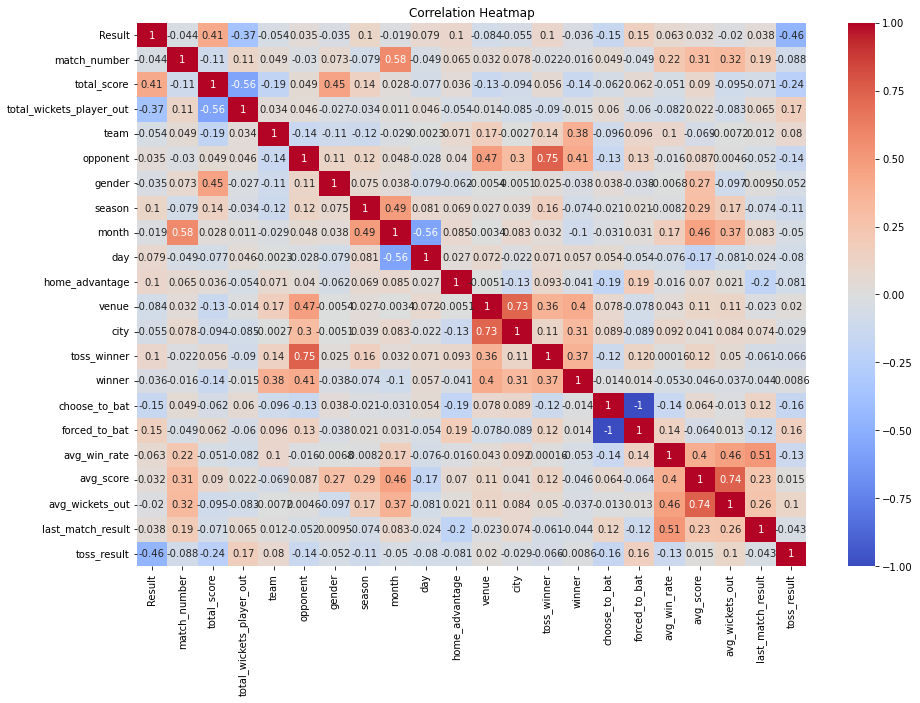

In [589]:
corr_matrix = df_bat.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

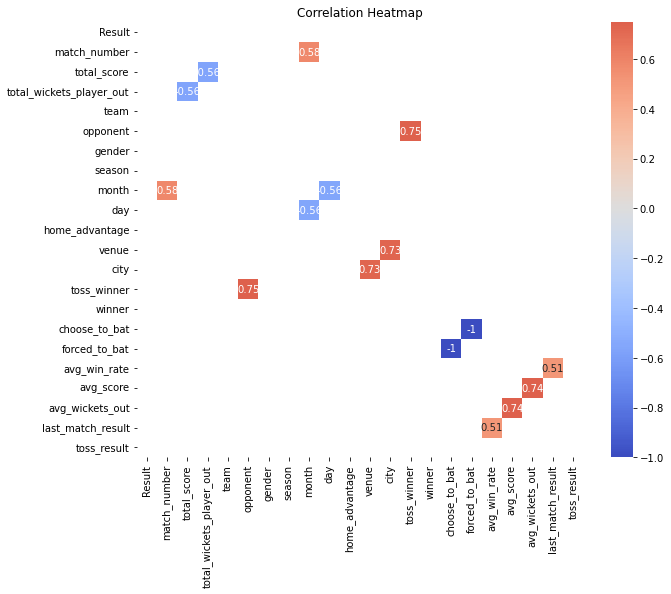

In [590]:
corr_matrix_no_diag = corr_matrix.copy()
np.fill_diagonal(corr_matrix_no_diag.values, np.nan)
mask = np.abs(corr_matrix_no_diag) > 0.5

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_no_diag[mask], annot=True, cmap='coolwarm', 
            center=0)  # 'center=0' ensures that the colormap is divergent
plt.title('Correlation Heatmap')
plt.show()

In [591]:
high_corr = pd.DataFrame({
    'Pairs': ['opponent & toss_winner', 'avg_score & avg_wickets_out', 'city & avenue', 
              'match_number & month', 'total_wickets_player_out & total_score', 'month & day', 
              'avg_win_rate & last_match_result'],
    'Correlation': [0.75, 0.74, 0.73, 0.58, -0.56, -0.56, 0.51]
})

print(high_corr)

                                    Pairs  Correlation
0                  opponent & toss_winner         0.75
1             avg_score & avg_wickets_out         0.74
2                           city & avenue         0.73
3                    match_number & month         0.58
4  total_wickets_player_out & total_score        -0.56
5                             month & day        -0.56
6        avg_win_rate & last_match_result         0.51


### There are three sets of variables with multicollinearity, so we introduce pca dimensionality reduction